<a href="https://colab.research.google.com/github/Davioliveira1305/Machine-Learning/blob/main/QualidadeVinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição

**Estão incluídos dois conjuntos de dados, relativos a amostras de vinho verde tinto e branco, provenientes do norte de Portugal. O objetivo é modelar a qualidade do vinho com base em testes físico-químicos (ver [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/) .**

**Os dois conjuntos de dados estão relacionados com variantes tintas e brancas do vinho português “Vinho Verde”. Para mais detalhes consulte: http://www.vinhoverde.pt/pt/ ou a referência [Cortez et al., 2009]. Devido a questões de privacidade e logística, apenas estão disponíveis variáveis ​​físico-químicas (entradas) e sensoriais (saída) (por exemplo, não existem dados sobre tipos de uva, marca do vinho, preço de venda do vinho, etc.).**

**Esses conjuntos de dados podem ser vistos como tarefas de classificação ou regressão. As classes são ordenadas e não equilibradas (ex. há muito mais vinhos normais do que excelentes ou pobres). Algoritmos de detecção de valores discrepantes poderiam ser usados ​​para detectar alguns vinhos excelentes ou ruins. Além disso, não temos certeza se todas as variáveis ​​de entrada são relevantes. Portanto, poderia ser interessante testar métodos de seleção de recursos.**
**Primeiramente vamos trabalhar com o dataset relacionado aos vinhos brancos**.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/winequality-white.csv', sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Vamos realizar uma análise exploratória de dados primeiramente.

**Descrição dos dados**

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Tipos dos dados**

In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Verificando os valores nulos do dataset. Observe que o nosso dataset não possui nenhum valor nulo**.

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Histograma dos dados. Note que a variável alvo não está equilibrada, a maioria dos dados não seguem uma distribuição normal, apresentando muito valores atípicos.**

In [ ]:
import plotly.express as px
colunas_numericas = data.select_dtypes(include=['number']).columns
# Criar um histograma para cada coluna
for coluna in colunas_numericas:
    fig = px.histogram(data, x=coluna, title=f'Histograma de {coluna}')
    fig.show()

**Matriz de correlação**

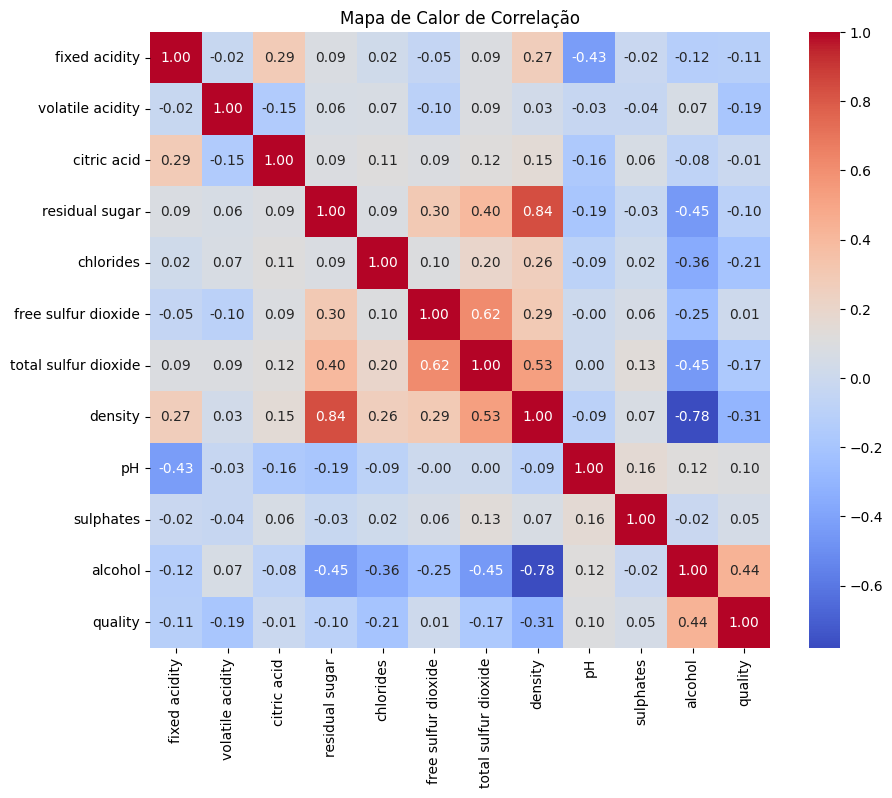

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')
plt.show()

# Machine Learning


## Como as classes estão muito desequilibradas, será criado dados sintéticos para o dataframe com o intuito de equilibrar as classes, um procedimento conhecido como oversampling(superamostragem)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X =  data.drop(data.columns[[-1]], axis=1).values
y = data.iloc[:,-1].values
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

**Divindo os dados entre conjunto de testes e de treinamento**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Criando um classificador utilizando árvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_Ad = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_Ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
predictions = classifier_Ad.predict(X_test)


In [ ]:
predictions

array([9, 4, 6, ..., 8, 4, 5])

**A acurácia melhorou em muito com os dados sintéticos, mas pode ter ocasionado overfitting nas classes que eram minoritárias antes do incremento dos dados sintéticos**.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.9057625649913345


              precision    recall  f1-score   support

           3       1.00      1.00      1.00       658
           4       0.96      1.00      0.98       687
           5       0.80      0.82      0.81       614
           6       0.75      0.61      0.67       649
           7       0.84      0.89      0.87       666
           8       0.96      1.00      0.98       691
           9       1.00      1.00      1.00       651

    accuracy                           0.91      4616
   macro avg       0.90      0.90      0.90      4616
weighted avg       0.90      0.91      0.90      4616



[[658   0   0   0   0   0   0]
 [  0 687   0   0   0   0   0]
 [  1  15 502  80  12   4   0]
 [  2  13 118 396 101  18   1]
 [  0   2  11  50 596   6   1]
 [  0   0   0   0   0 691   0]
 [  0   0   0   0   0   0 651]]


**Classificador SVM**

In [ ]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf', random_state = 0)
classifier_SVM.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_SVM = classifier_SVM.predict(X_test)

**O SVM teve uma pequena acurácia. Nota-se também que parece que houve um overfitting para prever a classe de quality igual a 9**



In [ ]:
print("Accuracy: ", accuracy_score(y_test,y_pred_SVM))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,y_pred_SVM))
print("\n")
print(confusion_matrix(y_test,y_pred_SVM))

Accuracy:  0.7307192374350087


              precision    recall  f1-score   support

           3       0.97      1.00      0.99       658
           4       0.76      0.87      0.81       687
           5       0.62      0.57      0.60       614
           6       0.45      0.35      0.39       649
           7       0.53      0.59      0.56       666
           8       0.73      0.71      0.72       691
           9       1.00      1.00      1.00       651

    accuracy                           0.73      4616
   macro avg       0.72      0.73      0.72      4616
weighted avg       0.72      0.73      0.73      4616



[[658   0   0   0   0   0   0]
 [  0 596  48  32   6   5   0]
 [  8 102 353 115  26  10   0]
 [  6  48 139 228 165  63   0]
 [  3  17  26 118 396 106   0]
 [  0  22   4  19 155 491   0]
 [  0   0   0   0   0   0 651]]


## Validação Cruzada

**Pra tentar evitar o overfitting, vamos realizar a validação cruzada nos nossos algoritmos.**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

**Classificador de árvore de decisão com validação cruzada**

In [ ]:
classifier_Ad_Vc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_predict
previsoes = cross_val_predict(classifier_Ad_Vc, X_resampled, y_resampled, cv=kf)

**Observe que assim mesmo aconteceu um overfitting para determinadas classes.**


In [ ]:
print("Accuracy: ", accuracy_score(y_resampled,previsoes))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_resampled,previsoes))
print("\n")
print(confusion_matrix(y_resampled,previsoes))

Accuracy:  0.9194722474977252


              precision    recall  f1-score   support

           3       0.99      1.00      1.00      2198
           4       0.96      1.00      0.98      2198
           5       0.82      0.85      0.84      2198
           6       0.82      0.65      0.72      2198
           7       0.86      0.94      0.90      2198
           8       0.97      1.00      0.98      2198
           9       1.00      1.00      1.00      2198

    accuracy                           0.92     15386
   macro avg       0.92      0.92      0.92     15386
weighted avg       0.92      0.92      0.92     15386



[[2198    0    0    0    0    0    0]
 [   0 2198    0    0    0    0    0]
 [   5   49 1859  229   49    7    0]
 [   6   40  373 1428  292   57    2]
 [   2    2   22   91 2068   11    2]
 [   0    0    0    0    0 2198    0]
 [   0    0    0    0    0    0 2198]]


**Classificador SVM com validação cruzada.**

In [ ]:
classifier_SVM_VC = SVC(kernel = 'rbf', random_state = 0)

In [ ]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

In [ ]:
previsoes = cross_val_predict(classifier_SVM_VC, X_resampled, y_resampled, cv=kf)

**Com a validação cruzada utilizada no SVM o fenômeno de overfitting não ocorreu, mas a acurácia do algoritmo ficou ridicularmente baixa.**

In [ ]:
print("Accuracy: ", accuracy_score(y_resampled,previsoes))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_resampled,previsoes))
print("\n")
print(confusion_matrix(y_resampled,previsoes))

Accuracy:  0.3288054075133238


              precision    recall  f1-score   support

           3       0.80      0.35      0.49      2198
           4       0.40      0.49      0.44      2198
           5       0.29      0.51      0.37      2198
           6       0.13      0.01      0.01      2198
           7       0.15      0.06      0.09      2198
           8       0.28      0.08      0.13      2198
           9       0.29      0.80      0.42      2198

    accuracy                           0.33     15386
   macro avg       0.33      0.33      0.28     15386
weighted avg       0.33      0.33      0.28     15386



[[ 764  545  614   54    0    0  221]
 [ 115 1088  572    0   51   39  333]
 [  43  403 1125   13   43   96  475]
 [  21  277  747   12  102  146  893]
 [   3  214  374   11  132  154 1310]
 [   4  195  487    0  176  179 1157]
 [   0    0    0    0  403   36 1759]]


## A metodologia que vai ser utilizada agora é a validação cruzada com a retirada das colunas do dataframe que possuem uma baixa correlação com a variável alvo do problema(quality).

In [ ]:
X = data.drop(columns = ['quality', 'citric acid', 'free sulfur dioxide', 'sulphates', 'pH', 'residual sugar'],axis=1).values
y = data.iloc[:, -1].values
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=0)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.30, random_state = 0)

**Classificador de árvore de decisão utilizando validação cruzada.**

In [ ]:
classifier_Ad_Vc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [ ]:
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=0)

In [ ]:
previsoes = cross_val_predict(classifier_Ad_Vc, X_resampled, y_resampled, cv=kf)

In [ ]:
print("Accuracy: ", accuracy_score(y_resampled,previsoes))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_resampled,previsoes))
print("\n")
print(confusion_matrix(y_resampled,previsoes))

Accuracy:  0.9199922007019369


              precision    recall  f1-score   support

           3       1.00      1.00      1.00      2198
           4       0.97      1.00      0.98      2198
           5       0.82      0.85      0.83      2198
           6       0.81      0.65      0.72      2198
           7       0.86      0.95      0.90      2198
           8       0.97      1.00      0.98      2198
           9       1.00      1.00      1.00      2198

    accuracy                           0.92     15386
   macro avg       0.92      0.92      0.92     15386
weighted avg       0.92      0.92      0.92     15386



[[2198    0    0    0    0    0    0]
 [   0 2198    0    0    0    0    0]
 [   2   35 1858  250   41   12    0]
 [   8   38  392 1426  284   46    4]
 [   1    6   19   76 2079   17    0]
 [   0    0    0    0    0 2198    0]
 [   0    0    0    0    0    0 2198]]
